In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score,log_loss
# setting display options to display all columns.
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',100)

warnings.filterwarnings('ignore')

In [2]:
# Importing data
df=pd.read_excel('/Users/macbook/Downloads/Online Retail.xlsx')
#Displaying first 5 rows of our dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Check the shape of train dataset
df.shape

(541909, 8)

In [4]:
print('Number of rows in our dataset are:',df.shape[0])
print('Number of columns in our dataset are:',df.shape[1])

Number of rows in our dataset are: 541909
Number of columns in our dataset are: 8


In [5]:
# Check the columns in the train dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# displaying data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#checking the number of missing values in each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# count of duplicated rows in the data
df.duplicated().sum()

5268

In [9]:
#Summary
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df=df[~df.duplicated()]
df.shape

(536641, 8)

In [11]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
df[df.InvoiceNo.str.startswith("C")==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [13]:
df[df['InvoiceNo'].str.startswith('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [14]:
# removing all the invoice number who starts with 'C' as they are returned orders
df = df[df['InvoiceNo'].str.startswith('C')!=True]
df.shape

(527390, 8)

In [15]:
df.nunique()

InvoiceNo      22064
StockCode       4059
Description     4207
Quantity         691
InvoiceDate    19990
UnitPrice       1293
CustomerID      4339
Country           38
dtype: int64

In [16]:
# the number of unique transactions are  22064
#the unique stock ids in the data or number of unqiue item sold :4059

In [17]:
# top 10 stock ids that sold the most
df.StockCode.value_counts().head(10)

85123A    2259
85099B    2112
22423     2012
47566     1700
20725     1582
84879     1477
22197     1418
22720     1396
21212     1352
22383     1307
Name: StockCode, dtype: int64

In [18]:
df.Quantity.describe()

count    527390.000000
mean         10.311272
std         160.367285
min       -9600.000000
25%           1.000000
50%           3.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

In [19]:
# looking at the distribution of the quantity
# we have seen  that there is negative value which might indicate return orders

In [20]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [21]:
# keeping only those transactions that have successfully ordered
df = df[df['Quantity']>=0]
df.shape

(526054, 8)

In [22]:
print('The minimum date is:',df.InvoiceDate.min())
print('The maximum date is:',df.InvoiceDate.max())

The minimum date is: 2010-12-01 08:26:00
The maximum date is: 2011-12-09 12:50:00


In [23]:
df.Country.value_counts(normalize=True)

United Kingdom          0.914627
Germany                 0.017160
France                  0.015955
EIRE                    0.014985
Spain                   0.004714
Netherlands             0.004492
Belgium                 0.003861
Switzerland             0.003724
Portugal                0.002836
Australia               0.002251
Norway                  0.002038
Italy                   0.001441
Channel Islands         0.001420
Finland                 0.001302
Cyprus                  0.001146
Sweden                  0.000855
Unspecified             0.000840
Austria                 0.000757
Denmark                 0.000722
Poland                  0.000627
Japan                   0.000610
Israel                  0.000555
Hong Kong               0.000532
Singapore               0.000422
Iceland                 0.000346
USA                     0.000340
Canada                  0.000287
Greece                  0.000276
Malta                   0.000213
United Arab Emirates    0.000129
European C

In [24]:
df['Country'] = df['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Others')
df.Country.value_counts(normalize=True)

United Kingdom    0.914627
Others            0.085373
Name: Country, dtype: float64

In [25]:
df.Description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1392
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
Name: Description, dtype: int64

In [26]:
df.Country.value_counts()

United Kingdom    481143
Others             44911
Name: Country, dtype: int64

In [27]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'LETTER "U" BLING KEY RING',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [28]:
df.Description.isnull().sum()

592

In [29]:
df[df['Description'].str.startswith('?')!=True].shape[0]

526048

In [30]:
df[df['Description'].str.startswith('?')!=True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,Others
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,Others
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,Others
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,Others


In [31]:
# removing noise values
df = df[df['Description'].str.startswith('?')!=True]
df.shape

(526048, 8)

In [32]:
df[df['Description'].str.startswith('*')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20749,538071,21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,NaN,United Kingdom
35675,539437,20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,NaN,United Kingdom
37095,539453,20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,NaN,United Kingdom


In [33]:
df[df.Description.str.startswith("BOOMBOX IPOD CLASSIC")]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [34]:
df['Description']=df['Description'].replace(('*Boombox Ipod Classic','*USB Office Mirror Ball'),
                                             ('BOOMBOX IPOD CLASSIC','USB OFFICE MIRROR BALL'))

In [35]:
df.Description

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 526048, dtype: object

In [36]:
pd.set_option("max_rows", None)

In [37]:
pd.set_option('max_columns', None)
pd.set_option("max_rows", None)
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2315
JUMBO BAG RED RETROSPOT                2112
REGENCY CAKESTAND 3 TIER               2009
PARTY BUNTING                          1700
LUNCH BAG RED RETROSPOT                1581
ASSORTED COLOUR BIRD ORNAMENT          1476
SET OF 3 CAKE TINS PANTRY DESIGN       1392
PACK OF 72 RETROSPOT CAKE CASES        1352
LUNCH BAG  BLACK SKULL.                1301
NATURAL SLATE HEART CHALKBOARD         1255
JUMBO BAG PINK POLKADOT                1232
HEART OF WICKER SMALL                  1219
JUMBO STORAGE BAG SUKI                 1194
PAPER CHAIN KIT 50'S CHRISTMAS         1184
JUMBO SHOPPER VINTAGE RED PAISLEY      1180
JAM MAKING SET PRINTED                 1164
LUNCH BAG SPACEBOY DESIGN              1164
LUNCH BAG CARS BLUE                    1162
SPOTTY BUNTING                         1156
JAM MAKING SET WITH JARS               1134
RECIPE BOX PANTRY YELLOW DESIGN        1126
POSTAGE                                1126
WOODEN PICTURE FRAME WHITE FINIS

In [38]:
df[df['Description'].str.islower()==True]['Description'].value_counts()

check                                  39
found                                  25
adjustment                             14
amazon                                  8
had been put aside                      5
dotcom                                  4
mailout                                 3
test                                    2
taig adjust                             2
returned                                2
rcvd be air temp fix for dotcom sit     1
wrongly coded 23343                     1
mailout                                 1
came coded as 20713                     1
amazon sales                            1
on cargo order                          1
to push order througha s stock was      1
wrongly sold (22719) barcode            1
check?                                  1
dotcom adjust                           1
amazon adjust                           1
dotcomstock                             1
found box                               1
for online retail orders          

In [39]:
# removing all the above noises
df = df[df['Description'].str.islower()!=True]
df.shape

(525920, 8)

In [40]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
df[df['Description'].str.istitle()==True]['Description'].value_counts()

Manual                                 323
Next Day Carriage                       79
Bank Charges                            12
Dotcomgiftshop Gift Voucher £20.00       9
Found                                    8
Dotcomgiftshop Gift Voucher £10.00       8
Amazon                                   7
Dotcomgiftshop Gift Voucher £30.00       7
Dotcomgiftshop Gift Voucher £50.00       4
Dotcomgiftshop Gift Voucher £40.00       3
High Resolution Image                    3
Adjustment                               2
John Lewis                               1
Dotcomgiftshop Gift Voucher £100.00      1
Amazon Adjustment                        1
Name: Description, dtype: int64

In [41]:
df = df[df['Description'].str.istitle()!=True]
df.shape

(525452, 8)

In [43]:
df['Description'] = df['Description'].str.strip()

In [44]:
# count of unique customer
df.CustomerID.nunique()

4335

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392353 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392353 non-null  object        
 1   StockCode    392353 non-null  object        
 2   Description  392353 non-null  object        
 3   Quantity     392353 non-null  int64         
 4   InvoiceDate  392353 non-null  datetime64[ns]
 5   UnitPrice    392353 non-null  float64       
 6   CustomerID   392353 non-null  float64       
 7   Country      392353 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


In [48]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [49]:
#Now there are no missing values left .

In [50]:
# creating some columns for exploratory

df['Amount'] = df['Quantity']*df['UnitPrice']
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek

In [51]:
#Displaying first 5 rows
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


# EDA

### Univariate Analysis

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392353 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392353 non-null  object        
 1   StockCode    392353 non-null  object        
 2   Description  392353 non-null  object        
 3   Quantity     392353 non-null  int64         
 4   InvoiceDate  392353 non-null  datetime64[ns]
 5   UnitPrice    392353 non-null  float64       
 6   CustomerID   392353 non-null  float64       
 7   Country      392353 non-null  object        
 8   Amount       392353 non-null  float64       
 9   year         392353 non-null  int64         
 10  month        392353 non-null  int64         
 11  day          392353 non-null  int64         
 12  hour         392353 non-null  int64         
 13  day_of_week  392353 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 44.9+ MB


In [54]:
df.shape

(392353, 14)

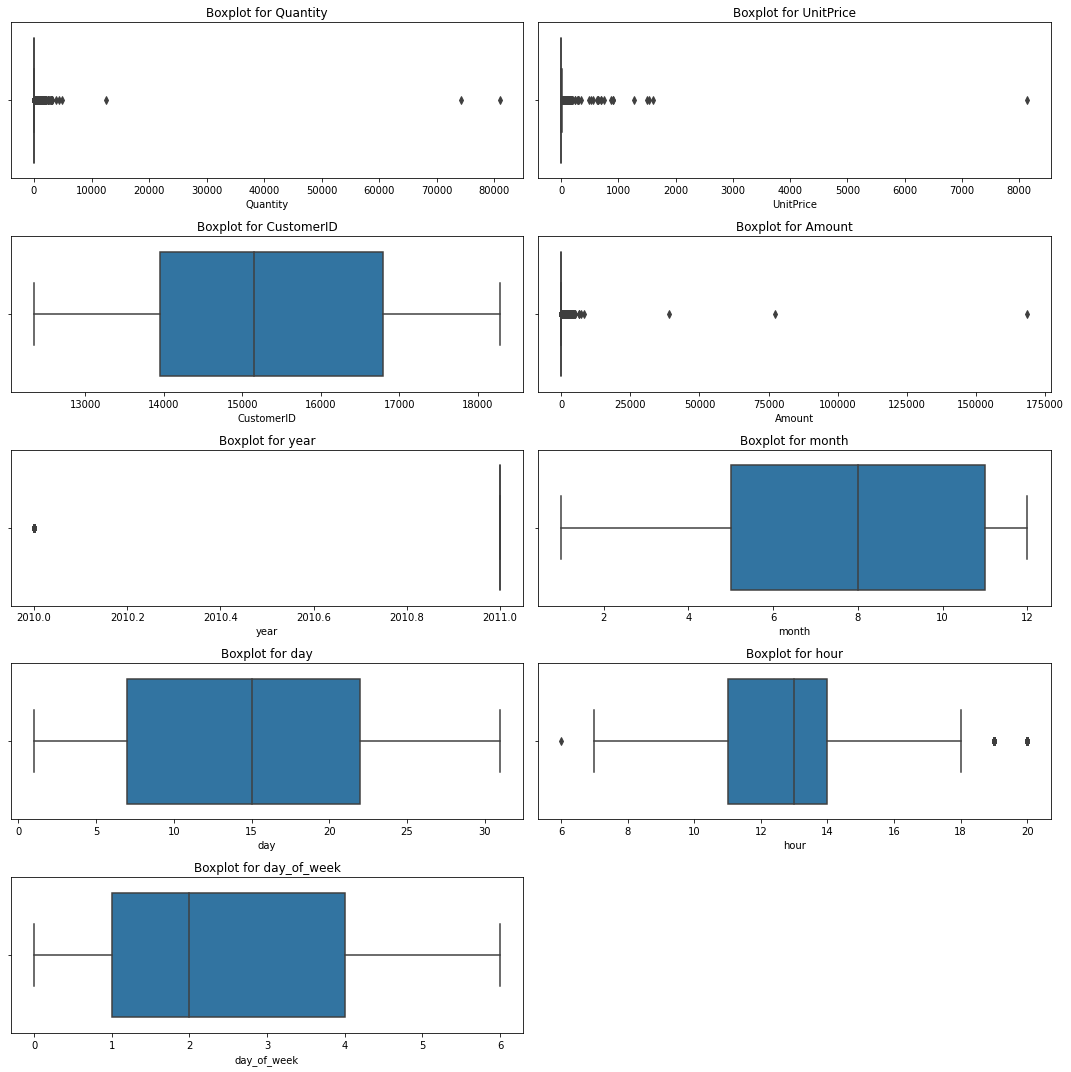

In [55]:
c = 1
fig = plt.figure(figsize=(15,15))
for i in df.select_dtypes(include=np.number):
    plt.subplot(5,2,c)
    sns.boxplot(df[i])
    plt.title('Boxplot for {}'.format(str(i)))
    c = c+1
plt.tight_layout()
plt.show()

In [57]:
df.Quantity.value_counts()

1        69353
12       59813
2        57391
6        37466
4        32082
3        26804
24       23692
10       21159
8        11592
5         8097
48        5974
25        4974
20        4761
16        3944
36        3738
72        1934
100       1799
96        1798
18        1552
7         1296
9         1169
30        1087
40        1021
144       1012
32        1001
50         895
60         647
120        599
15         447
200        413
11         341
192        337
64         270
240        260
288        243
14         236
80         203
13         200
108        136
128        133
216        117
28         107
300        106
160         88
432         81
480         76
17          72
19          71
600         70
21          65
150         62
22          60
576         59
360         57
75          53
400         48
42          47
27          47
384         44
180         42
84          42
720         41
26          36
90          34
250         32
23          30
54        

In [58]:
# removing the expectional case where quantity > 70000
df = df[df['Quantity']<70000]

In [60]:
df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).values

array([259657.3 , 194390.79,  91062.38,  80850.84,  66653.56,  65164.79,
        65039.62,  60632.75,  58762.08,  58030.48])

Text(0.5, 1.0, 'Top 10 customers in terms of sales in UK')

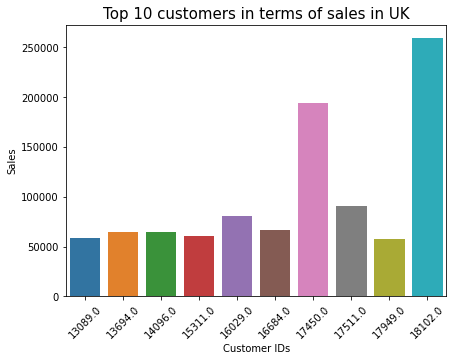

In [61]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).index, 
            )
plt.ylabel('Sales')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of sales in UK',size=15)

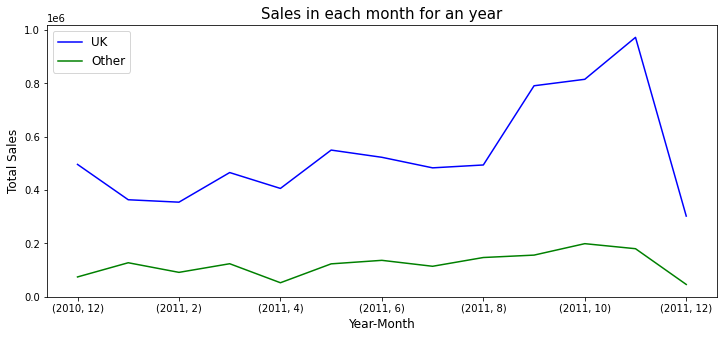

In [62]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='Other',color='green')
plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

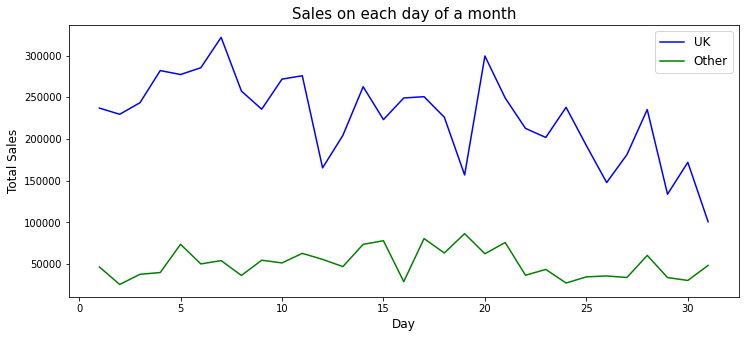

In [63]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['day'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['day'])['Amount'].sum().plot(kind='line',label='Other',color='green')
plt.xlabel('Day',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales on each day of a month', size=15)
plt.legend(fontsize=12)
plt.show()

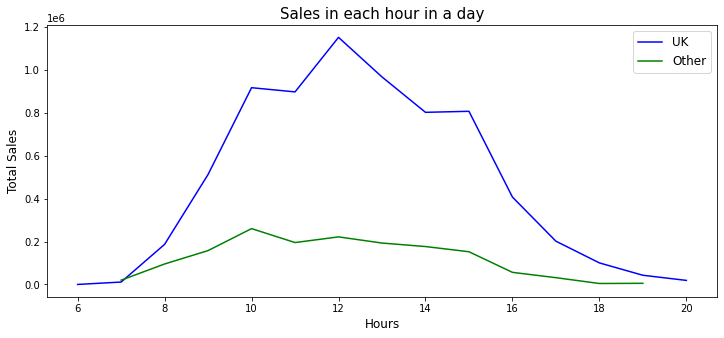

In [64]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='Other',color='green')
plt.xlabel('Hours',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each hour in a day', size=15)
plt.legend(fontsize=12)
plt.show()

In [66]:
df.shape

(392351, 14)

In [76]:
# copying the data in other df
df_rfm = df.copy()
# keeping only desired columns
df_rfm = df_rfm.iloc[:,:9]
df_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [77]:
# extracting the RECENCY

recency = pd.DataFrame(df_rfm.groupby('CustomerID')['InvoiceDate'].max().reset_index())
recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate']).dt.date
recency['MaxDate'] = recency['InvoiceDate'].max()
recency['recency'] = (recency['MaxDate'] - recency['InvoiceDate']).dt.days + 1
recency = recency[['CustomerID','recency']]
recency.head()

,CustomerID,recency
0,12347.0,3
1,12348.0,76
2,12349.0,19
3,12350.0,311
4,12352.0,37


In [78]:
# extracting the FREQUENCY

frequency = pd.DataFrame(df_rfm.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())
frequency.columns = ['fCustomerID','frequency']
frequency.head()

,fCustomerID,frequency
0,12347.0,7
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,7


In [79]:
# extracting the MONETARY

monetary = pd.DataFrame(df_rfm.groupby('CustomerID')['Amount'].sum().reset_index())
monetary.columns = ['mCustomerID','monetary']
monetary.head()

,mCustomerID,monetary
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,1665.74


In [80]:
# combining the three into one table

rfm = pd.concat([recency,frequency,monetary], axis=1)
rfm.drop(['fCustomerID','mCustomerID'], axis=1, inplace=True)
rfm.head(10)

,CustomerID,recency,frequency,monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,7,1665.74
5,12353.0,205,1,89.00
6,12354.0,233,1,1079.40
7,12355.0,215,1,459.40
8,12356.0,23,3,2811.43
9,12357.0,34,1,6207.67


In [81]:
rfm.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,CustomerID,recency,frequency,monetary
count,4334.000000,4334.000000,4334.000000,4334.000000
mean,15299.461698,93.171897,4.258191,1981.251445
std,1721.689380,100.122257,7.658263,8527.197292
min,12347.000000,1.000000,1.000000,0.000000
25%,13812.250000,18.000000,1.000000,305.867500
50%,15297.500000,51.000000,2.000000,666.875000
75%,16778.750000,143.000000,5.000000,1649.155000
90%,17685.700000,264.000000,9.000000,3613.486000
95%,17984.350000,312.000000,13.000000,5728.081000
99%,18225.670000,369.000000,30.000000,18315.474900


In [82]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it is

rfm['recency_score'] = pd.cut(rfm['recency'], bins=[0,18,51,143,264,375], labels=[5,4,3,2,1])
rfm['recency_score'] = rfm['recency_score'].astype('int')
rfm['frequency_score'] = pd.cut(rfm['frequency'], bins=[0,1,2,5,9,210], labels=[1,2,3,4,5])
rfm['frequency_score'] = rfm['frequency_score'].astype('int')
rfm['monetary_score'] = pd.cut(rfm['monetary'], bins=[-1,306,667,1650,3614,290000], labels=[1,2,3,4,5])
rfm['monetary_score'] = rfm['monetary_score'].astype('int')

In [83]:
rfm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4334 non-null   float64
 1   recency          4334 non-null   int64  
 2   frequency        4334 non-null   int64  
 3   monetary         4334 non-null   float64
 4   recency_score    4334 non-null   int64  
 5   frequency_score  4334 non-null   int64  
 6   monetary_score   4334 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 237.1 KB


In [84]:
# summing the R,F,M score to make a one single column that has value range from 3-15

def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score'])
rfm['score'] = rfm.apply(score_rfm,axis=1 )
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
0,12347.0,3,7,4310.00,5,4,5,14.0
1,12348.0,76,4,1797.24,3,3,4,10.0
2,12349.0,19,1,1757.55,4,1,4,9.0
3,12350.0,311,1,334.40,1,1,2,4.0
4,12352.0,37,7,1665.74,4,4,4,12.0


In [85]:
# assigning the customers into one of the category Bronze, Silver, Gold,Platinum and diamond based upon the score they get
# we make cuts using percentiles. It can be done in many other ways

rfm['customer_type'] = pd.cut(rfm['score'], bins=[0,6,8,11,13,16], labels=['Bronze','Silver','Gold','Platinum','Diamond'])
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,customer_type
0,12347.0,3,7,4310.00,5,4,5,14.0,Diamond
1,12348.0,76,4,1797.24,3,3,4,10.0,Gold
2,12349.0,19,1,1757.55,4,1,4,9.0,Gold
3,12350.0,311,1,334.40,1,1,2,4.0,Bronze
4,12352.0,37,7,1665.74,4,4,4,12.0,Platinum


In [86]:
round(rfm.customer_type.value_counts(normalize=True)*100,0)

Bronze      33.0
Gold        28.0
Silver      20.0
Platinum    10.0
Diamond      9.0
Name: customer_type, dtype: float64

##### We see that around 9% of customers are in Diamond category and these are the customers who score is best in all the three RFM. Combining with the silver 20% customers are those who are genuine and honest with the business. Silver category are those where the business can target to convert them into gold category by rolling out offers and new strategies for them. Bronze category are those who are less concerned for the business and does not put much efforts to bring them back.

In [87]:
# looking the RFM value for each of the category
rfm.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)

,recency,frequency,monetary
customer_type,,,
Bronze,188.0,1.0,297.0
Silver,78.0,2.0,621.0
Gold,44.0,4.0,1416.0
Platinum,20.0,7.0,2863.0
Diamond,10.0,19.0,12111.0


In [88]:
# copying the data into new variable
df_kmeans = rfm.copy()
# taking only relevant columns
df_kmeans = df_kmeans.iloc[:,:4]
df_kmeans.head()

,CustomerID,recency,frequency,monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,7,1665.74


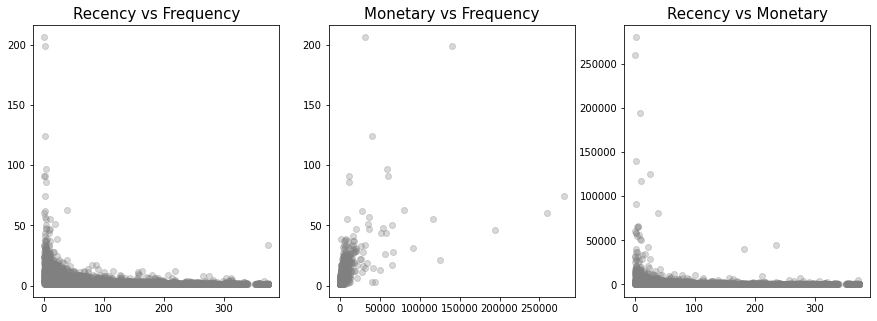

In [89]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df_kmeans.recency, df_kmeans.frequency, color='grey', alpha=0.3)
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(df_kmeans.monetary, df_kmeans.frequency, color='grey', alpha=0.3)
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(df_kmeans.recency, df_kmeans.monetary, color='grey', alpha=0.3)
plt.title('Recency vs Monetary', size=15)
plt.show()

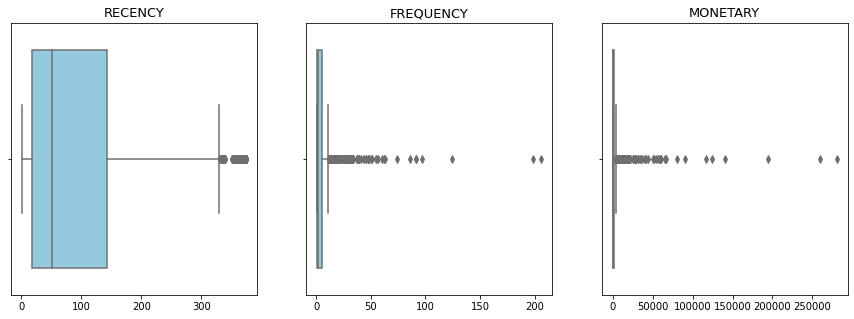

In [90]:
# checking the distribution of the variables

column = ['recency','frequency','monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_kmeans[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [91]:
# Removing outliers for Monetary
Q1 = df_kmeans.monetary.quantile(0.05)
Q3 = df_kmeans.monetary.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.monetary >= Q1 - 1.5*IQR) & (df_kmeans.monetary <= Q3 + 1.5*IQR)]

In [92]:
# Removing outliers for Recency
Q1 = df_kmeans.recency.quantile(0.05)
Q3 = df_kmeans.recency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.recency >= Q1 - 1.5*IQR) & (df_kmeans.recency <= Q3 + 1.5*IQR)]


In [93]:
# Removing outliers for Frequency
Q1 = df_kmeans.frequency.quantile(0.05)
Q3 = df_kmeans.frequency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.frequency >= Q1 - 1.5*IQR) & (df_kmeans.frequency <= Q3 + 1.5*IQR)]

In [94]:
# resetting the index
df_kmeans = df_kmeans.reset_index(drop=True)
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4259 entries, 0 to 4258
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4259 non-null   float64
 1   recency     4259 non-null   int64  
 2   frequency   4259 non-null   int64  
 3   monetary    4259 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 133.2 KB


In [95]:
# removing customer id as it will not used in making cluster
df_kmeans = df_kmeans.iloc[:,1:]

In [96]:
# scaling the variables and store it in different df
standard_scaler = StandardScaler()
df_kmeans_norm = standard_scaler.fit_transform(df_kmeans)

In [97]:
# converting it into dataframe
df_kmeans_norm = pd.DataFrame(df_kmeans_norm)
df_kmeans_norm.columns = ['recency','frequency','monetary']
df_kmeans_norm.head()

,recency,frequency,monetary
0,-0.912760,0.877595,1.680623
1,-0.184490,0.098534,0.272852
2,-0.753139,-0.680528,0.250616
3,2.159940,-0.680528,-0.546702
4,-0.573566,0.877595,0.199179


##### Initially without any knowledge we are clustering the data into 5 clusters. The only intution to do is as in RFM we categorize the data into 5 categories.Later we look different methods to decide the optimal value for k.

In [99]:
from sklearn.cluster import KMeans

In [100]:
# Kmeans with K=5

model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(df_kmeans_norm)

KMeans(n_clusters=5)

In [102]:

df_kmeans['clusters'] = model_clus5.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,3,7,4310.00,0
1,76,4,1797.24,4
2,19,1,1757.55,3
3,311,1,334.40,2
4,37,7,1665.74,4


In [103]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,24.0,11.0,4297.0
1,14.0,18.0,8775.0
2,254.0,1.0,434.0
3,55.0,2.0,574.0
4,34.0,6.0,2014.0


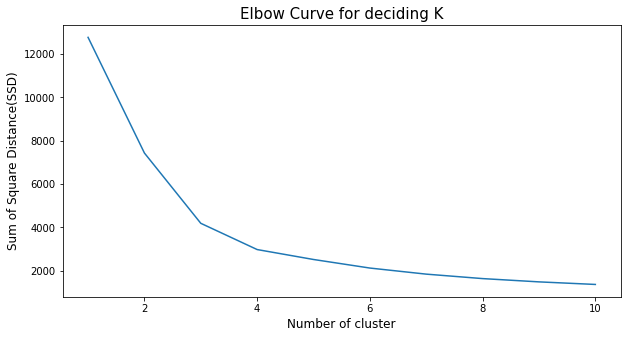

In [104]:
# Elbow-curve/SSD

ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

In [106]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5460929706945657
For n_clusters=3, the silhouette score is 0.5106176573737885
For n_clusters=4, the silhouette score is 0.4865715970728021
For n_clusters=5, the silhouette score is 0.44185916176884094
For n_clusters=6, the silhouette score is 0.4169656865593138
For n_clusters=7, the silhouette score is 0.4176726675939886
For n_clusters=8, the silhouette score is 0.38667007992559166
For n_clusters=9, the silhouette score is 0.3828237377768398
For n_clusters=10, the silhouette score is 0.34884112902732384


##### *From the elbow curve we observe the elbow at cluster 3 and cluster 4.
##### *Also from Silhouette analysis we see the value is better when number of cluster will be 3 rather than 4.
#### *So we now categorize the data into 3 clusters and check their RFM values and its distribution.

In [107]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(df_kmeans_norm)

KMeans(n_clusters=3)

In [108]:
df_kmeans['clusters'] = model_clus3.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,3,7,4310.00,2
1,76,4,1797.24,0
2,19,1,1757.55,0
3,311,1,334.40,1
4,37,7,1665.74,0


In [109]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,46.0,3.0,1016.0
1,249.0,1.0,435.0
2,21.0,12.0,5412.0
